<h1>Visualizations for the second presentation</h1>
<p>Dana Mirafzal-07/06/2023</p>

In [182]:
########### Imports ###########
from database.connect import getConnection
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
########### Setups ###########
sns.set()
connection=getConnection()
cursor=connection.cursor()

<h2>Conversation Statistics</h2>

In [184]:
airlines=['KLM','AirFrance','British_Airways','AmericanAir','Lufthansa','AirBerlin','AirBerlin assist','easyJet','RyanAir','SingaporeAir','Qantas','EtihadAirways','VirginAtlantic']
desiredAirlines=['AmericanAir','British_Airways']

In [185]:
lengths=[]

In [186]:
cursor.execute("SELECT * FROM conversations")
allConversations=cursor.fetchall()

In [187]:
for conversation in allConversations:
    
    conv_length=conversation[4]
    conv_airlines=conversation[3].replace('[','').replace(']','').split(',')
    conv_airlines=[x for x in conv_airlines if x!='0']
    for airline in airlines:
        if(airline in conv_airlines):
            if(airline in desiredAirlines):
                lengths.append((airline,conv_length))
            else:
                lengths.append(("Others",conv_length))
    


In [188]:
## Create dataframe based on the data points gathered from the database
df=pd.DataFrame(lengths,columns=['Airline','Length'])

In [204]:
# Summary statistics about the conversation lengths for different airlines
b=df.groupby('Airline')
b.agg(['min','max','median','mean'])

Length                     
                   min max median      mean
Airline                                    
AmericanAir          2  53    2.0  3.011797
British_Airways      2  44    3.0  3.312946
Others               2  57    2.0  3.157341

Text(0, 0.5, 'Length of conversations')

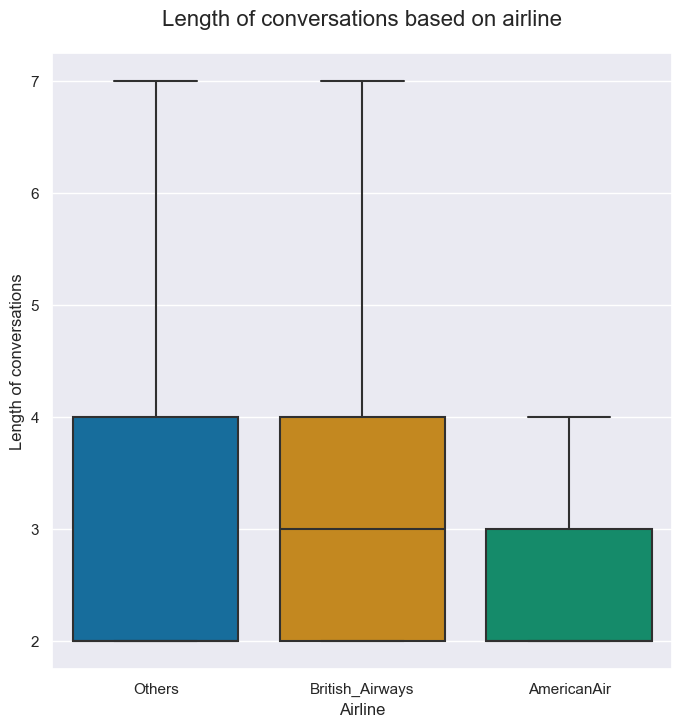

In [214]:

fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(x="Airline",y="Length",data=df,palette='colorblind',ax=ax,showfliers=False)
ax.set_title("Length of conversations based on airline",fontsize=16,pad=20)
ax.set_ylabel("Length of conversations")


In [191]:
onlyAmericanAir=df[df['Airline']=='AmericanAir']
onlyAmericanAir.plot(kind='kde',title='Distribution of conversation length for American Airlines',xlim=(0,60),xlabel="Conversation Lengths")